<a href="https://colab.research.google.com/github/afonsodebritto/IC-GeologiQA/blob/main/Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import csv
import numpy as np

### Wine quality data-set

In [ ]:
wine_path = "/content/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

In [ ]:
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [ ]:
col_list = next(csv.reader(open(wine_path), delimiter=";"))

In [ ]:
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [ ]:
wineq = torch.from_numpy(wineq_numpy)

In [ ]:
wineq.shape, wineq.type()

(torch.Size([4898, 12]), 'torch.FloatTensor')

In [ ]:
data = wineq[:, :-1]

In [ ]:
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [ ]:
target = wineq[:, -1]

In [ ]:
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [ ]:
target = wineq[:, -1].long()

In [ ]:
target

tensor([6, 6, 6,  ..., 6, 7, 6])

In [ ]:
target_onehot = torch.zeros(target.shape[0], 10)

In [ ]:
target_onehot.scatter(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [ ]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [ ]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

In [ ]:
bad_indexes = torch.le(target, 3)
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [ ]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [ ]:
bad_data = data[torch.le(target, 3)]
mid_data = data[torch.gt(target, 3) & torch.lt(target, 7)]
good_data = data[torch.ge(target, 7)]

In [ ]:
bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

In [ ]:
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
  print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [ ]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.type(), predicted_indexes.sum()

(torch.Size([4898]), 'torch.BoolTensor', tensor(2727))

In [ ]:
actual_indexes = torch.gt(target, 5)

actual_indexes.shape, actual_indexes.type(), actual_indexes.sum()

(torch.Size([4898]), 'torch.BoolTensor', tensor(3258))

In [ ]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

### Parameter estimation

Suppose that you took a trip to some obscure location and brought back a fancy, wallmounted analog thermometer. It looks great, it’s a perfect fit for your living room. Its only flaw is that it doesn’t show units. Not to worry; you’ve got a plan. You’ll build a data set of readings and corresponding temperature values in your favorite units, choose a model, and adjust its weights iteratively until a measure of the error is low enough, and you’ll finally be able to interpret the new readings in units you understand.

In [ ]:
# Data collected
# Temperature in Celsius
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
# Unknown units
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [ ]:
# Making tensors out of the data
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [ ]:
print(t_c.shape, t_c.type())
print(t_u.shape, t_u.type())

torch.Size([11]) torch.FloatTensor
torch.Size([11]) torch.FloatTensor


In [ ]:
# Chosing a linear model as first try
# w = weight
# b = bias
def linear_model(t_u, w, b):
  return t_u * w + b

In [ ]:
# Loss function
def mean_square_loss_func(t_p, t_c):
  squarred_differences = (t_p - t_c) ** 2
  return squarred_differences.mean()

In [ ]:
# Initalize parameters
w = torch.ones(1)
b = torch.zeros(1)

In [ ]:
# Invoke the model
t_p = linear_model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
loss = mean_square_loss_func(t_p, t_c)
loss

tensor(1763.8848)

In [ ]:
delta = 0.1

In [ ]:
loss_change_rate_w = (mean_square_loss_func(linear_model(t_u, w + delta, b), t_c) - mean_square_loss_func(linear_model(t_u, w - delta, b), t_c)) / (2 * delta)

In [ ]:
learning_rate = 1e-2

In [ ]:
w = w - learning_rate * loss_change_rate_w

In [ ]:
loss_change_rate_b = (mean_square_loss_func(linear_model(t_u, w, b + delta), t_c) - mean_square_loss_func(linear_model(t_u, w, b + delta), t_c)) / (2 * delta)

In [ ]:
b = b - learning_rate * loss_change_rate_b

In [ ]:
def derivative_loss_function(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c)
  return dsq_diffs

In [ ]:
# Derivative of the linear model in respect to w
def derivative_linear_model_w(t_u, w, b):
  return t_u

# Derivative of the linear model in respect to b
def derivative_linear_model_b(t_u, w, b):
  return 1.0

In [ ]:
def gradient_function(t_u, t_c, t_p, w, b):
  derivative_loss_w = derivative_loss_function(t_p, t_c) * derivative_linear_model_w(t_u, w, b)
  derivative_loss_b = derivative_loss_function(t_p, t_c) * derivative_linear_model_b(t_u, w, b)
  return torch.stack([derivative_loss_w.mean(), derivative_loss_b.mean()])

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params

    # Forward pass
    t_p = linear_model(t_u, w, b)
    loss = mean_square_loss_func(t_p, t_c)
    # Backward pass
    grad = gradient_function(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad

    print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

In [ ]:
t_un = t_u * 0.1

In [ ]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314299
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
t_p = linear_model(t_un, *params)

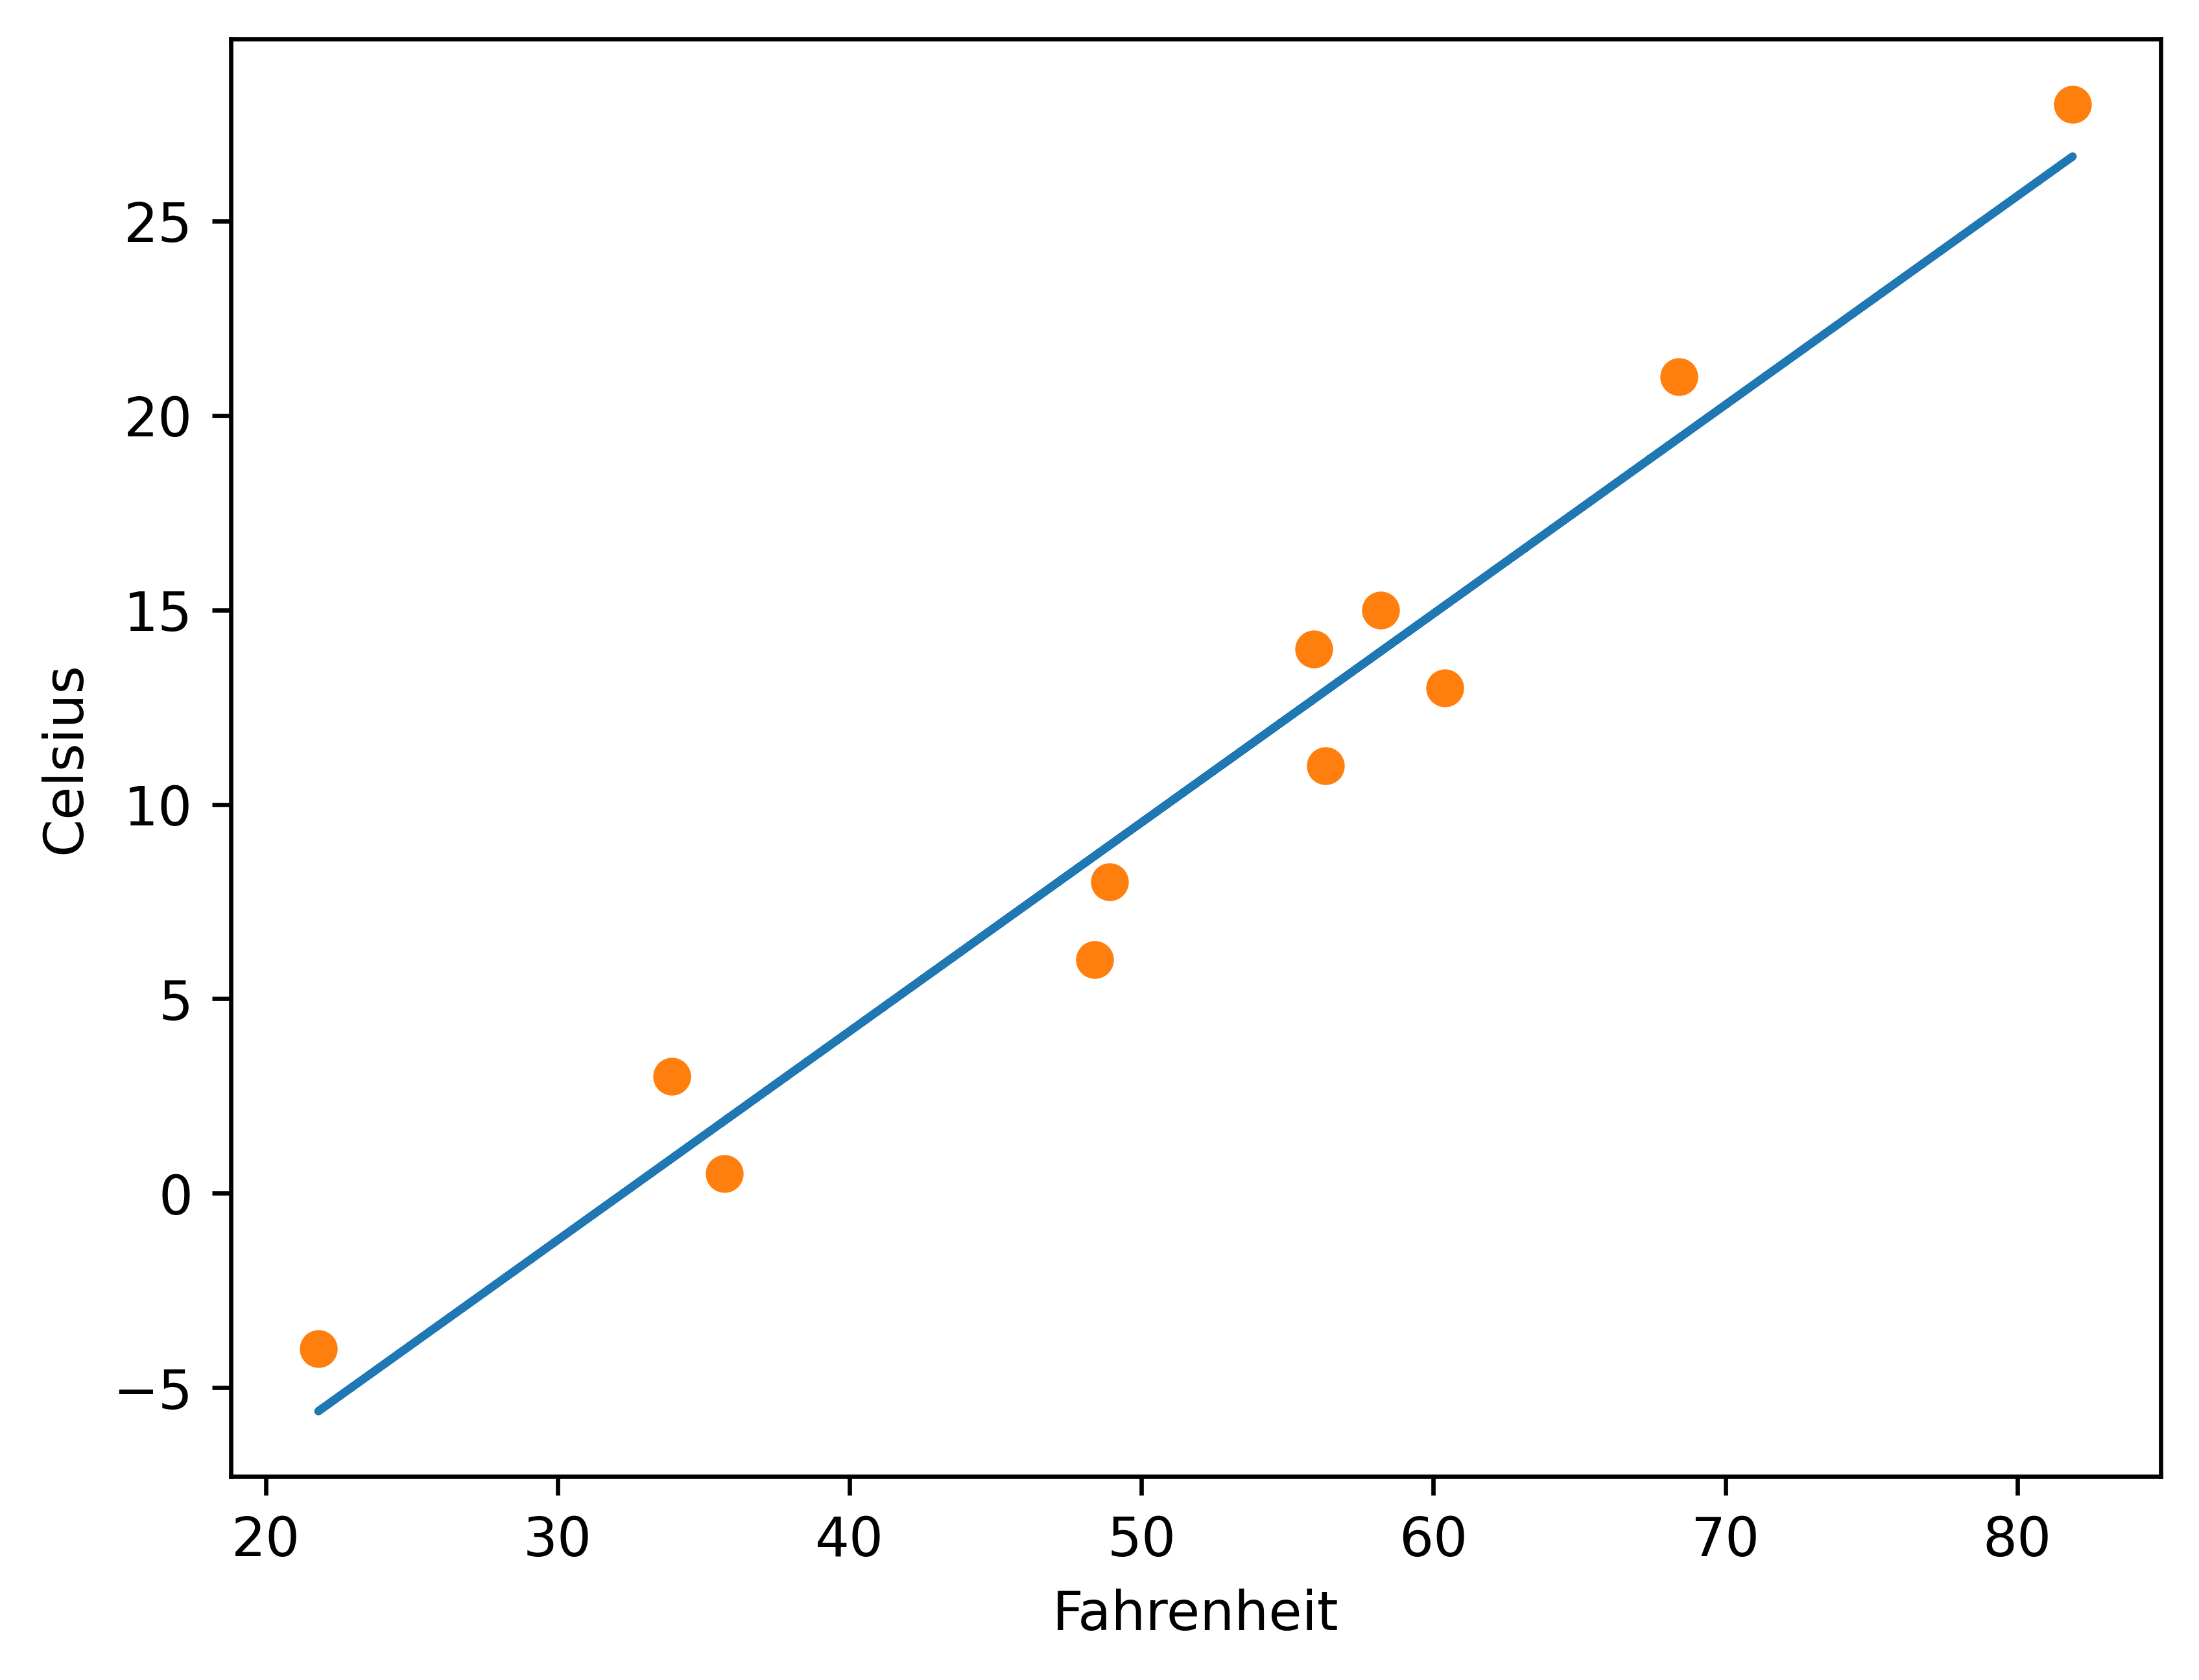

In [ ]:
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [ ]:
# Using autograd
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [ ]:
loss = mean_square_loss_func(linear_model(t_u, *params), t_c)

In [ ]:
loss.backward()

In [ ]:
params.grad

tensor([4517.2969,   82.6000])

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()

    t_p = linear_model(t_u, *params)
    loss = mean_square_loss_func(t_p, t_c)
    loss.backward()

    params = (params - learning_rate * params.grad).detach().requires_grad_()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [ ]:
training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [ ]:
learning_rate = 1e-5

In [ ]:
import torch.optim as optim

In [ ]:
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
t_p = linear_model(t_u, *params)

In [ ]:
loss = mean_square_loss_func(t_p, t_c)

In [ ]:
loss.backward()

In [ ]:
optimizer.step()

In [ ]:
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = linear_model(t_un, *params)
loss = mean_square_loss_func(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = linear_model(t_u, *params)
    loss = mean_square_loss_func(t_p, t_c)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [ ]:
n_samples = t_u.shape[0]
n_samples

11

In [ ]:
n_val = int(0.2 * n_samples)
n_val

2

In [ ]:
shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([ 4,  1,  5,  3,  8,  6,  2,  0, 10,  7,  9])

In [ ]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 4,  1,  5,  3,  8,  6,  2,  0, 10]), tensor([7, 9]))

In [ ]:
# t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

t_u, t_c

(tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]),
 tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]))

In [ ]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
train_t_u, train_t_c

(tensor([56.3000, 55.9000, 48.9000, 81.9000, 48.4000, 33.9000, 58.2000, 35.7000,
         68.4000]),
 tensor([11.0000, 14.0000,  8.0000, 28.0000,  6.0000,  3.0000, 15.0000,  0.5000,
         21.0000]))

In [ ]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
val_t_u, val_t_c

(tensor([21.8000, 60.4000]), tensor([-4., 13.]))

In [ ]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u
train_t_un, val_t_un

(tensor([5.6300, 5.5900, 4.8900, 8.1900, 4.8400, 3.3900, 5.8200, 3.5700, 6.8400]),
 tensor([2.1800, 6.0400]))

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = linear_model(train_t_u, *params)
    train_loss = mean_square_loss_func(train_t_p, train_t_c)

    val_t_p = linear_model(val_t_u, *params)
    val_loss = mean_square_loss_func(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print('Epoch {}, Training loss {}, Validation loss {}'.format(epoch, float(train_loss), float(val_loss)))

  return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
training_loop(n_epochs = 3000, optimizer = optimizer, params = params, train_t_u = train_t_un, val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training loss 88.59707641601562, Validation loss 43.31699752807617
Epoch 2, Training loss 34.421913146972656, Validation loss 35.03486633300781
Epoch 3, Training loss 27.57990264892578, Validation loss 40.214229583740234
Epoch 500, Training loss 9.516918182373047, Validation loss 9.029813766479492
Epoch 1000, Training loss 4.543169021606445, Validation loss 2.596876382827759
Epoch 1500, Training loss 3.1108789443969727, Validation loss 2.9066433906555176
Epoch 2000, Training loss 2.698423147201538, Validation loss 4.1561784744262695
Epoch 2500, Training loss 2.579646110534668, Validation loss 5.138675212860107
Epoch 3000, Training loss 2.5454416275024414, Validation loss 5.755766868591309


tensor([  5.6473, -18.7334], requires_grad=True)